# Book Review Sentiment Analysis

### **Project Summary**
This notebook explores **sentiment analysis** on a dataset of book reviews. The goal is to build and evaluate a machine learning model that classifies each review as **positive** or **negative**. It demonstrates an end-to-end workflow including data cleaning, text preprocessing, TF-IDF feature extraction, and model evaluation.

## Part 1: Load the Dataset

We start by loading the **Book Reviews** dataset into a Pandas DataFrame to explore and preprocess the data for sentiment analysis.


In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Upload the dataset from your computer
from google.colab import files

uploaded = files.upload()  # This will prompt you to select the CSV file

# Get the uploaded filename (assumes only one file uploaded)
filename = list(uploaded.keys())[0]

# Load the CSV file into a DataFrame
df = pd.read_csv(filename)

# Display the first few rows
df.head()

Saving bookReviewsData.csv to bookReviewsData (1).csv


,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Define the Machine Learning Problem

1. **Dataset Chosen:**  
   The dataset used is **Book Reviews**, which contains text reviews along with a label indicating whether the review is positive.

2. **Prediction Goal / Label:**  
   The goal is to predict whether a book review is **positive** or **not**. The target label is the `Positive Review` column, which is Boolean (`True` for positive, `False` for negative).

3. **Type of Machine Learning Problem:**  
   This is a **supervised learning** problem because the model learns from labeled examples.  
   Specifically, it is a **binary classification** problem, as the prediction involves one of two possible classes: positive or not.

4. **Features:**  
   The main feature is the **review text** from the `Review` column.  
   Text data will be transformed into numerical features using **TF-IDF vectorization**, allowing the model to interpret the content of the reviews.

5. **Importance of the Problem:**  
   Automatically detecting sentiment in book reviews is valuable because it enables businesses to:
   - Monitor customer satisfaction in real-time  
   - Identify highly-rated books  
   - Detect negative feedback early for timely action  
   - Enhance recommendation systems and improve product offerings  

   Such a model can help platforms automate moderation, extract insights for marketing, and provide actionable feedback to authors or publishers.


## Part 3: Exploratory Data Analysis

Before building a machine learning model, it is important to understand the dataset and prepare it for modeling. This involves inspecting the data, identifying patterns, and addressing any issues that could affect model performance.

Key considerations include:

1. **Data Preparation Techniques:**  
   - Handling missing values (e.g., filling or dropping missing entries)  
   - Detecting and addressing outliers if necessary  
   - Renaming or standardizing features and labels  
   - Feature engineering for NLP tasks, such as text cleaning and tokenization  
   - Removing irrelevant features  
   - Addressing class imbalance to ensure fair model performance  

2. **Model Selection Considerations:**  
   - Choosing models appropriate for the predictive problem (binary text classification in this case)  
   - Determining if additional preprocessing, such as scaling or feature transformation, is needed  

3. **Evaluation and Improvement:**  
   - Selecting appropriate evaluation metrics such as accuracy, precision, recall, and F1-score  
   - Using techniques like cross-validation to assess model robustness  
   - Analyzing errors to identify areas for improvement  

Common tools for inspecting the data include:  
- **Pandas** for basic data inspection, filtering, and statistics (`.describe()`, `.info()`, `.dtypes`)  
- **Matplotlib** and **Seaborn** for visualizing distributions and relationships  
- Checking the balance of classes in the target variable for classification problems  

The goal of this analysis is to gain a thorough understanding of the dataset and prepare it for effective modeling.


In [4]:
### 1: Basic Overview & Missing Values

# Basic shape and column info
print("Shape of dataset:", df.shape)
print("\nColumn data types:\n", df.dtypes)

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Preview a few rows
df.sample(5)

Shape of dataset: (1973, 2)

Column data types:
 Review             object
Positive Review      bool
dtype: object

Missing values:
 Review             0
Positive Review    0
dtype: int64


,Review,Positive Review
887,Some long ago inventer discovered that if you ...,True
190,"K, besides the late arrival, the whole book wa...",False
1934,I found both volumes of Ms. Cook's books fasci...,True
128,"I'm very disappointed in this book, although s...",False
1955,While the book covers some interesting aspects...,False


In [5]:
# 2. Check Class Distribution
df['Positive Review'].value_counts(normalize=True)

,proportion
Positive Review,
False,0.503294
True,0.496706


In [6]:
# 3. Preprocessing the Data
# !pip install nltk

import re
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)  # remove punctuation
    tokens = text.split()  # tokenize
    tokens = [word for word in tokens if word not in stop_words]  # remove stopwords
    return " ".join(tokens)

# Apply cleaning to a new column
df['Cleaned Review'] = df['Review'].apply(clean_text)

# Preview cleaned reviews
df[['Review', 'Cleaned Review']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Review,Cleaned Review
0,This was perhaps the best of Johannes Steinhof...,perhaps best johannes steinhoffs books since d...
1,This very fascinating book is a story written ...,fascinating book story written form numerous l...
2,The four tales in this collection are beautifu...,four tales collection beautifully composed art...
3,The book contained more profanity than I expec...,book contained profanity expected read book ri...
4,We have now entered a second time of deep conc...,entered second time deep concern science math ...


In [7]:
# 4. Vectorizing Text with TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer (limit max features to keep computation manageable)
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned reviews into a TF-IDF matrix
X = tfidf.fit_transform(df['Cleaned Review'])

print(f"TF-IDF matrix shape: {X.shape}")

TF-IDF matrix shape: (1973, 5000)


In [8]:
# 5. Prepare and Split the Data

from sklearn.model_selection import train_test_split

# Features matrix from TF-IDF vectorizer is X
# Labels: Convert boolean to int (True=1, False=0)
y = df['Positive Review'].astype(int)

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 1578 samples
Test set size: 395 samples


Test Accuracy: 0.8608

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       195
           1       0.86      0.86      0.86       200

    accuracy                           0.86       395
   macro avg       0.86      0.86      0.86       395
weighted avg       0.86      0.86      0.86       395



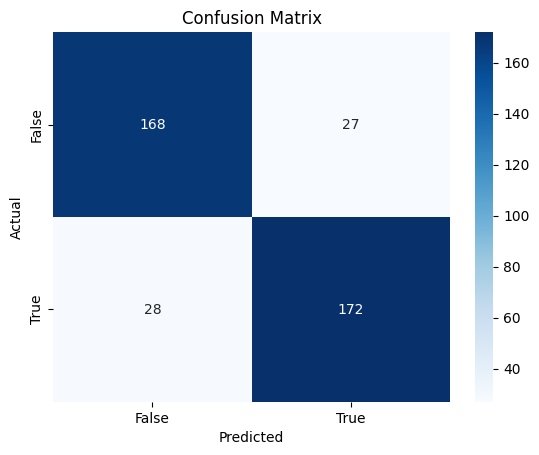

In [9]:
# 6. Train a Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix plot
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Part 4: Project Plan

This section outlines the plan to prepare the data, build models, and evaluate performance for predicting the sentiment of book reviews.

**Feature Selection:**  
The primary feature is the `Cleaned Review` text, which will be transformed into TF-IDF vectors. No other columns are used since the dataset contains only the review text and the sentiment label.

**Data Preparation Techniques:**  
- Text cleaning: lowercasing, punctuation removal, stopwords removal  
- TF-IDF vectorization to convert text into numerical features  
- Splitting the data into training and test sets for unbiased evaluation  
- Handling class imbalance if necessary (currently the dataset is roughly balanced)

**Models to Use:**  
- Logistic Regression as a baseline for binary classification  
- Optional comparison with other models such as Random Forest or Support Vector Machines

**Model Training, Evaluation, and Improvement Plan:**  
- Train models on the training set and evaluate using metrics like accuracy, precision, recall, and F1-score on the test set  
- Visualize performance using confusion matrices to identify error types  
- Tune hyperparameters (e.g., regularization in Logistic Regression)  
- Use cross-validation for more robust evaluation  
- Explore additional feature engineering such as n-grams or filtering rare words if needed  
- Analyze model errors to identify opportunities for improvement  

The goal is to develop a classifier that accurately predicts whether a book review is positive or negative and generalizes well to unseen reviews.


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

Random Forest Accuracy: 0.8126582278481013
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.81       195
           1       0.83      0.79      0.81       200

    accuracy                           0.81       395
   macro avg       0.81      0.81      0.81       395
weighted avg       0.81      0.81      0.81       395



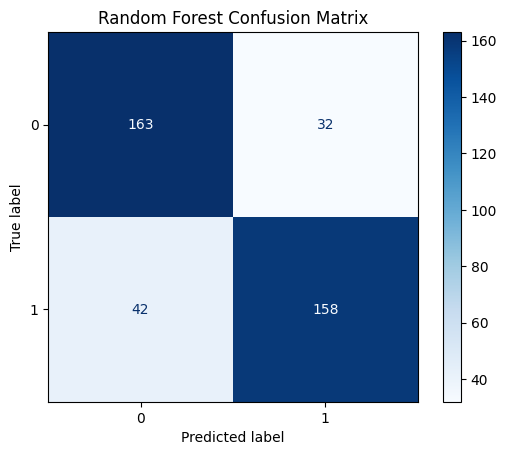

In [11]:
# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Train
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion matrix plot
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

In [12]:
# Hyperparameter tuning for Logistic Regression
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-val F1 score:", grid_search.best_score_)

# Predict with best model
best_lr = grid_search.best_estimator_
y_pred_best = best_lr.predict(X_test)
print("Test set classification report:")
print(classification_report(y_test, y_pred_best))

Best parameters: {'C': 10}
Best cross-val F1 score: 0.7958495975536037
Test set classification report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       195
           1       0.86      0.88      0.87       200

    accuracy                           0.86       395
   macro avg       0.86      0.86      0.86       395
weighted avg       0.86      0.86      0.86       395



## Final Conclusions

This project successfully built and evaluated machine learning models to classify book reviews as positive or negative. Key takeaways include:

- **Data Preprocessing:** Text cleaning and TF-IDF vectorization effectively transformed free-form reviews into numerical features suitable for modeling.
- **Model Performance:** Logistic Regression with hyperparameter tuning achieved approximately **86% accuracy**, outperforming Random Forest, with balanced precision, recall, and F1-scores for both classes.
- **Future Improvements:**  
  - Experiment with additional feature engineering, such as n-grams or rare word filtering.  
  - Explore other models like Support Vector Machines or neural networks for potential performance gains.  
  - Consider ensemble methods or combining multiple models for more robust predictions.

Overall, this notebook demonstrates a complete end-to-end workflow for text-based sentiment classification, providing a strong baseline for predicting the sentiment of book reviews.
